
#                     ExploratoryDataAnalysis on Flight Data 
<img src=gettyimages-841583072.jpg></img>

In [ ]:
# Read Data

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
flightData = pd.read_csv("flight_data.csv")
flight_data = pd.read_csv("flight_data.csv")
flightData.head(2)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,01-01-2013 05:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,01-01-2013 05:00


In [ ]:
flightData.describe()

#Time Series Data anlaysis - Monthly,Daily wise Flights

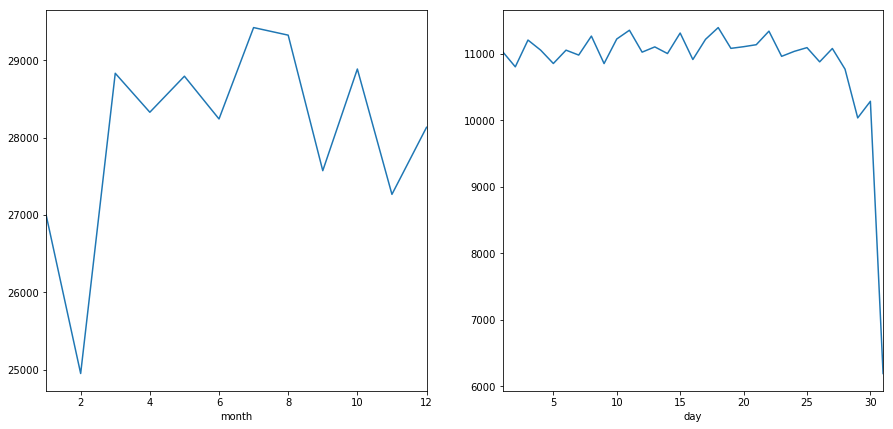

In [53]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,7))
flightData.groupby(['month'])['flight'].count().plot(ax=axes[0])
flightData.groupby(['day'])['flight'].count().plot(ax=axes[1])

Monthly figure - Passengers first month were travelled as normal where in 2nd month very lowest in total year might be prices are increased. However in March passengers travelled more, it was continue and in July most peoples were travelled in over a year.
Moreover, in October passengers travelled decline and after increased and decreases.

Passengers were travelling daily with same number of flights with small variations where as in month end drastically decreases the number flights. 


#### Flight Metrics


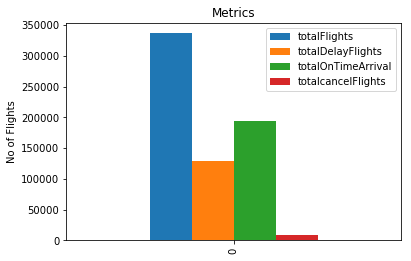

In [51]:
totalFlights = len(flightData)
cancelFlights = flightData[flightData.dep_time.isnull()]
totalcancelFlights = len(cancelFlights)
delayFlights  = flightData[flightData['dep_delay']>0]
totalDelayFlights =len(delayFlights)
onTimeArrival = flightData[flightData['arr_delay']<=0]
totalOnTimeArrival = len(onTimeArrival)
Metrics_list = [[totalFlights,totalDelayFlights,totalOnTimeArrival,totalcancelFlights]]
Metrics = pd.DataFrame(data = Metrics_list,columns=['totalFlights','totalDelayFlights','totalOnTimeArrival','totalcancelFlights'])
Metrics.plot.bar(stacked=False)
plt.ylabel('No of Flights')
plt.title("Metrics")

As shown in metrics, most of flights were running on time however some of delayed. Very few were canceled.

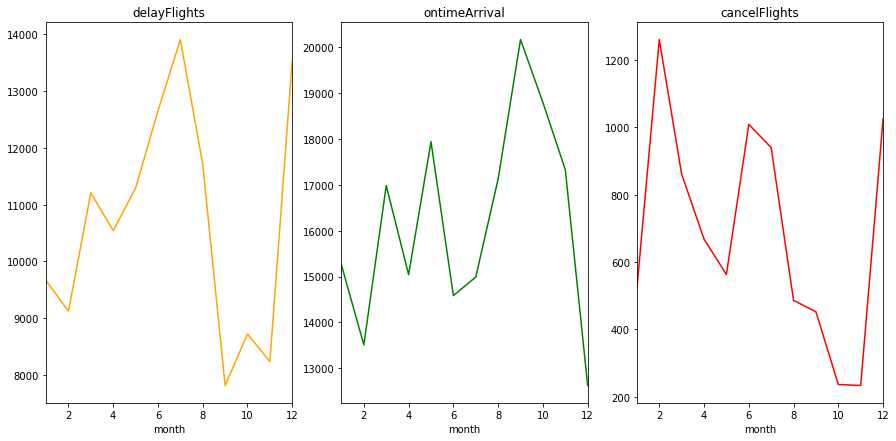

In [65]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,7))
delayFlights.groupby(['month'])['flight'].count().plot(ax=axes[0],color='orange',label='delayFlights')
onTimeArrival.groupby(['month'])['flight'].count().plot(ax=axes[1],color='g',label='onTimeArrival')
cancelFlights.groupby(['month'])['flight'].count().plot(ax=axes[2],color='r')
axes[0].set_title('delayFlights')
axes[1].set_title('ontimeArrival')
axes[2].set_title('cancelFlights')

Flights were delay vey less till April, after most of the flights delay increased and maximum in June. In July, Delay was controlled and very few flights were delayed in September. Thereafter no of flights delay increased again.

Flights were arrived on time vey less till April and up down, after July most of the flights reached on time and maximum in September. Thereafter no of flights arrival on time decreased again. 

Initial months no of canceled flights were more and again happen in July.  Very few flights were canceled in between October and November.

##### Speed Analysis

C:\Users\Edukondalu_Konakanch\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


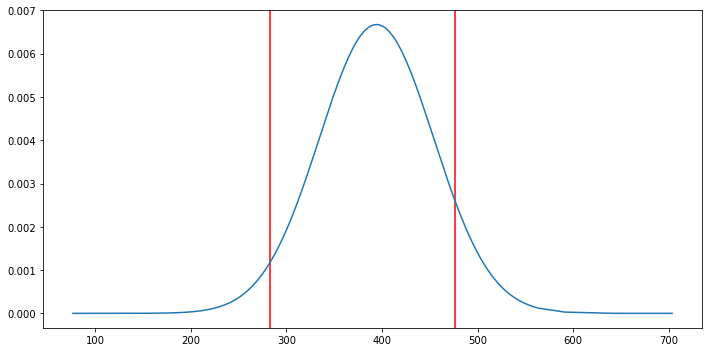

In [14]:
#distance=velocity*time
from scipy.stats import norm
flightData['speed']= flightData['distance']/(flightData['air_time']/60)
speed = flightData['speed'].fillna(flightData['speed'].mean())
#plt.hist(speed)
speed.sort()
mean=speed.mean()
std = speed.std()
fig, axes = plt.subplots(figsize=(10,5))
x5_pct = np.percentile(speed,5)
x95_pct = np.percentile(speed,95)
plt.axvline(x=x5_pct,color='r')
plt.axvline(x=x95_pct,color='r')
#plt.hist(speed)
p=norm.pdf(speed,mean,std)
plt.plot(speed,p)
fig.tight_layout()
plt.show()

All most all flights speed lies in between 280 to 480KMPH

HighestSpeedFlights:
tailnum
N666DN    703.384615
N17196    650.322581
Name: speed, dtype: float64
LowestSpeedFlights:
tailnum
N505SW    258.139535
N746SK    274.800000
Name: speed, dtype: float64


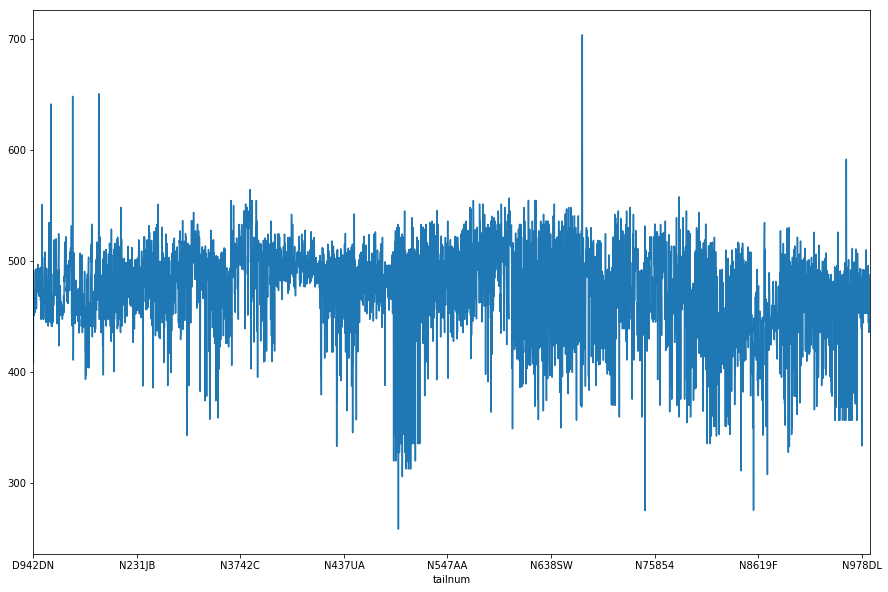

In [71]:
HighestSpeedFlights =flightData.groupby(['tailnum'])['speed'].max()
HighestSpeedFlights.plot(figsize=(15,10))
print("HighestSpeedFlights:")
print(HighestSpeedFlights.nlargest(2))
print("LowestSpeedFlights:")
print(HighestSpeedFlights.nsmallest(2))

In [73]:
delayFlight_data = flight_data[flight_data['dep_delay']>0].dropna()
TotalDelayFlight = len(delayFlight_data)
Totalflight_data = len(flight_data)
pctDelayFlight = (TotalDelayFlight/Totalflight_data)*100
pctDelayFlight

37.93174097916716

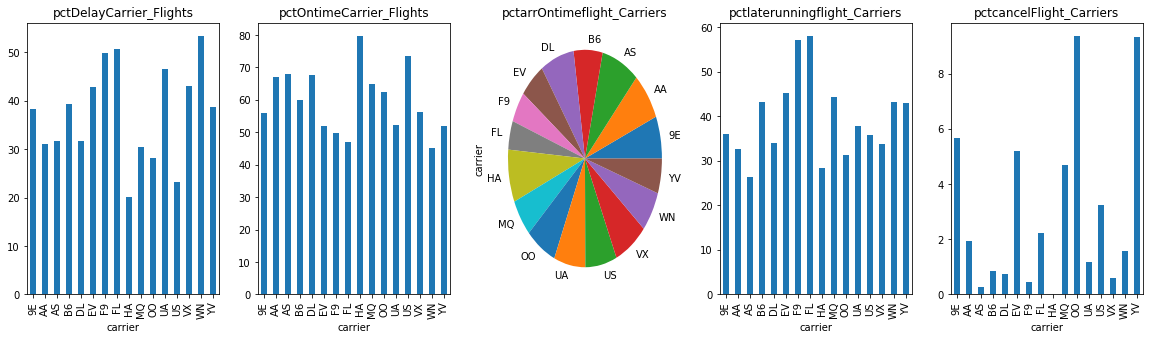

In [101]:

fig, axes = plt.subplots(nrows=1, ncols=5,figsize=(20,5))

totalCarrier_flights = flight_data.groupby(['carrier'])['carrier'].count()
totalDelayCarrier_flights = flight_data[flight_data['dep_delay']>0].groupby(['carrier'])['carrier'].count()
pctDelayCarrier_flights = (totalDelayCarrier_flights/totalCarrier_flights)*100
pctDelayCarrier_flights.plot(kind='bar',ax=axes[0]);axes[0].set_title('pctDelayCarrier_Flights')
totalOntimeCarrier_flights = flight_data[flight_data['dep_delay']<=0].groupby(['carrier'])['carrier'].count()
pctOntimeCarrier_flights = (totalOntimeCarrier_flights/totalCarrier_flights)*100
pctOntimeCarrier_flights.plot(kind='bar',ax=axes[1]);axes[1].set_title('pctOntimeCarrier_Flights')
arrOntimeFlight_Carriers = flight_data[flight_data['arr_delay']<=0].groupby(['carrier'])['carrier'].count() 
pctarrOntimeflight_Carriers = (arrOntimeFlight_Carriers/totalCarrier_flights)*100
pctarrOntimeflight_Carriers.plot(kind='pie',ax=axes[2]);axes[2].set_title('pctarrOntimeflight_Carriers')
laterunningFlight_Carriers = flight_data[flight_data['arr_delay']>0].groupby(['carrier'])['carrier'].count() 
pctlaterunningflight_Carriers = (laterunningFlight_Carriers/totalCarrier_flights)*100
pctlaterunningflight_Carriers.plot(kind='bar',ax=axes[3]);axes[3].set_title('pctlaterunningflight_Carriers')
cancelFlight_Carriers = flight_data[flightData.dep_time.isnull()].groupby(['carrier'])['carrier'].count() 
pctcancelFlight_Carriers = (cancelFlight_Carriers/totalCarrier_flights)*100
pctcancelFlight_Carriers.plot(kind='bar',ax=axes[4]);axes[4].set_title('pctcancelFlight_Carriers')


WN carrier most of flights were running delay so didnt maintian ontime and running lates.
HA carrier very few flights were running delay,almost more flights running ontime as well as reached ontime.
OO and YV carrier most of the flights were canceled.